In [1]:
import pandas as pd
import os
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
if os.path.isfile('./.env') == True:
    from dotenv import load_dotenv
    load_dotenv('.env')

db_credentials_dict = {"user": os.getenv("DB_USER"),
         "password": os.getenv("DB_PASSWORD"),
         "host": os.getenv("DB_HOST"),
         "port": os.getenv("DB_PORT"),
         "database": os.getenv("DB")
         }

In [3]:
schema_name = "ldb"
print("Using schema",schema_name,"on",db_credentials_dict["host"])

print("Creating engine...")
engine = create_engine(f'postgresql+psycopg2://{db_credentials_dict["user"]}:{db_credentials_dict["password"]}@{db_credentials_dict["host"]}:{db_credentials_dict["port"]}/{db_credentials_dict["database"]}', connect_args={'options': '-csearch_path={}'.format(schema_name),'connect_timeout': 3})

print("-- Engine created.")

Using schema ldb on None
Creating engine...


ValueError: invalid literal for int() with base 10: 'None'

In [6]:
def sql_select(engine,query):
    connection = engine.connect()
    df = pd.read_sql_query(query, connection)
    connection.close()
    return df

In [8]:
data = sql_select(engine, "select * from app_search_data limit 100")

In [9]:
data.shape

(100, 37)

In [109]:
data.describe

<bound method NDFrame.describe of                                                 filing_url  \
0        https://lda.senate.gov/filings/public/filing/a...   
1        https://lda.senate.gov/filings/public/filing/4...   
2        https://lda.senate.gov/filings/public/filing/5...   
3        https://lda.senate.gov/filings/public/filing/9...   
4        https://lda.senate.gov/filings/public/filing/f...   
...                                                    ...   
1617296  https://lda.senate.gov/filings/public/filing/7...   
1617297  https://lda.senate.gov/filings/public/filing/4...   
1617298  https://lda.senate.gov/filings/public/filing/b...   
1617299  https://lda.senate.gov/filings/public/filing/0...   
1617300  https://lda.senate.gov/filings/public/filing/1...   

                                  filing_uuid  filing_year  \
0        a04f5f1d-7203-49a1-a05a-98c71b7d539c         2022   
1        4e3476cb-3e20-41e6-823d-7aad44d9d7bb         2022   
2        53102de6-8895-42ab-9231-3f

In [110]:
data.isnull().sum()

filing_url                                  0
filing_uuid                                 0
filing_year                                 0
client_uuid                                 0
client_id                                   0
client_name                                 0
search_clients                              0
ticker_symbol                         1390139
search_tickers                        1390139
client_ticker_indicator                     0
client_ticker_indicator_bool                0
client_government_entity                    0
client_government_entity_bool               0
aff_orgs_indicator_bool                     0
aff_orgs_indicator                          0
affiliated_organizations_count        1606669
registrant_id                               0
registrant_name                             0
search_registrants                          0
lobbyist_ids                                0
agencies                               375401
agency_count                      

<AxesSubplot:>

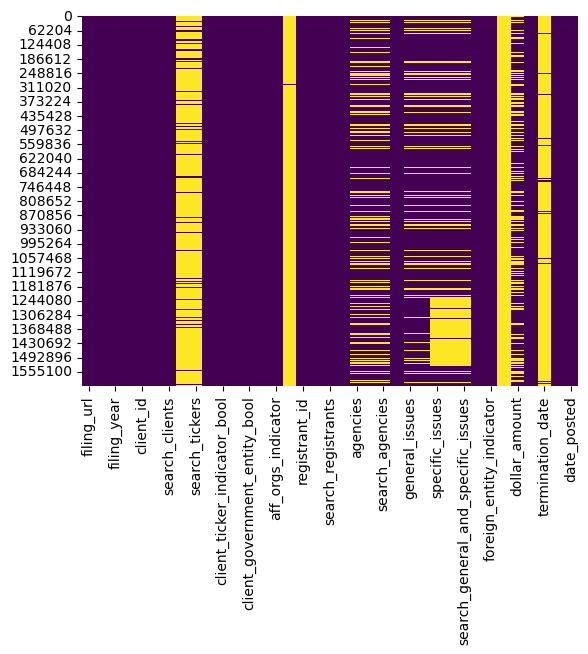

In [133]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617301 entries, 0 to 1617300
Data columns (total 37 columns):
 #   Column                              Non-Null Count    Dtype         
---  ------                              --------------    -----         
 0   filing_url                          1617301 non-null  object        
 1   filing_uuid                         1617301 non-null  object        
 2   filing_year                         1617301 non-null  int64         
 3   client_uuid                         1617301 non-null  object        
 4   client_id                           1617301 non-null  int64         
 5   client_name                         1617301 non-null  object        
 6   search_clients                      1617301 non-null  object        
 7   ticker_symbol                       227162 non-null   object        
 8   search_tickers                      227162 non-null   object        
 9   client_ticker_indicator             1617301 non-null  object        

<AxesSubplot:>

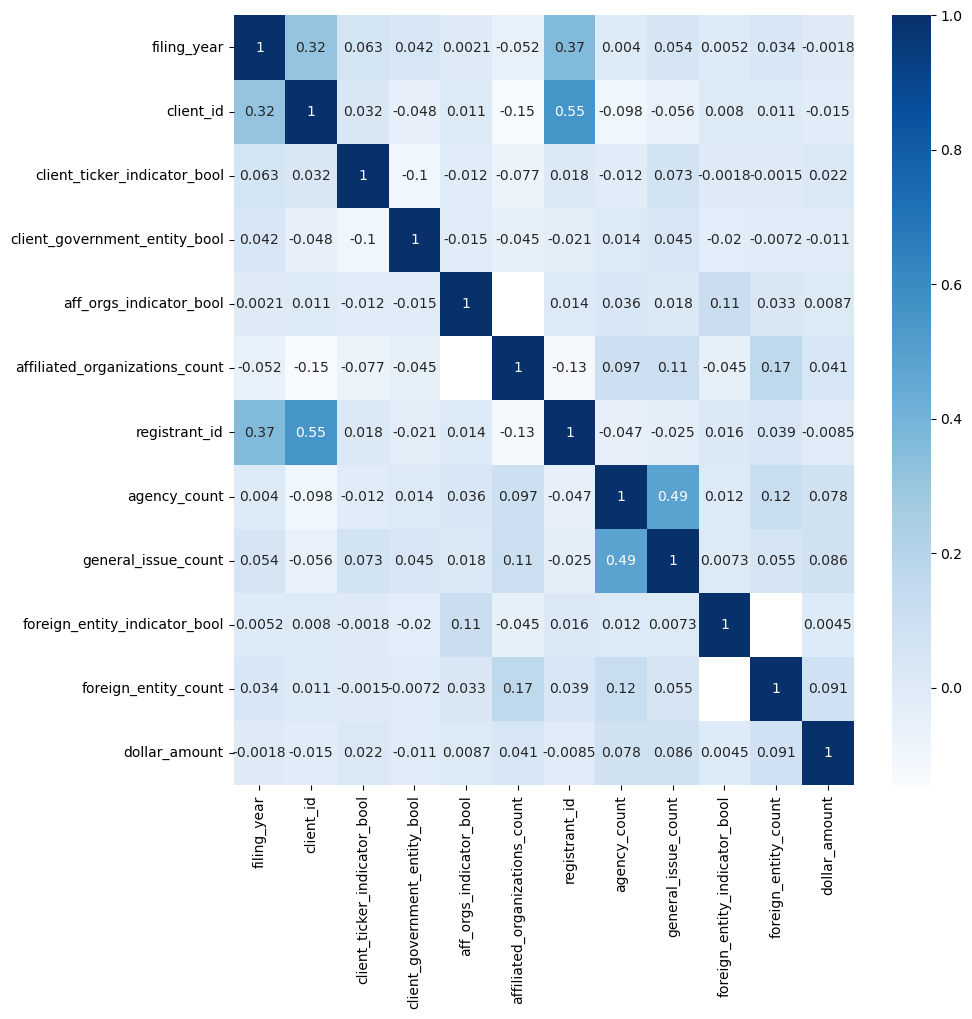

In [134]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cbar=True,annot=True,cmap='Blues')

In [8]:
data.head()

,filing_url,filing_uuid,filing_year,client_uuid,client_id,client_name,search_clients,ticker_symbol,search_tickers,client_ticker_indicator,...,search_specific_issues,search_general_and_specific_issues,foreign_entity_indicator_bool,foreign_entity_indicator,foreign_entity_count,dollar_amount,filing_type,termination_date,date_time_posted,date_posted
0,https://lda.senate.gov/filings/public/filing/e...,eb1fc7d8-31a8-4c89-a641-11c3456b4374,2022,725c738c2e07e3c2b267acde7a5af7598aa78d30b1cc9e...,137726,Government Of U.S. Virgin Islands,'govern':1 'island':5 'u.s':3 'virgin':4,None,None,No,...,'2021':66 '2022':49 '2471':42 '5460':58 'accep...,'2021':66A '2022':49A '2471':42A '5460':58A 'a...,0,No,NaN,220000.0,1st Quarter - Report,None,2022-04-13 10:53:59,2022-04-13
1,https://lda.senate.gov/filings/public/filing/1...,16a5e246-a210-412d-bbe9-9d5b4dbe83d9,2022,c7a179dba1f0206e9a5501b0c9313055b5ade3d6ad8e77...,212757,Haas Automation Inc.,'autom':2 'haa':1 'inc':3,None,None,No,...,"'alloc':7,26 'associ':17 'base':13,23 'chain':...","'alloc':7A,26A 'associ':17A 'base':13A,23A 'ch...",0,No,NaN,20000.0,1st Quarter - Report,None,2022-04-13 10:53:25,2022-04-13
2,https://lda.senate.gov/filings/public/filing/d...,d133ca6f-f317-423e-9eb3-3f5bc0a8d0ce,2022,e40b8114d12df2999ce483f806ef2c17a149b7c4cee63c...,203950,Greg Kelly,'greg':1 'kelli':2,None,None,No,...,None,None,0,No,NaN,NaN,1st Quarter - Termination (No Activity),2022-01-01,2022-04-13 10:53:05,2022-04-13
3,https://lda.senate.gov/filings/public/filing/e...,edc83511-3426-4c83-ac2c-3118f70a9543,2022,087ae04744228095ca89c7d27f72d962a20b5eca70a5d1...,50769,Foodshed.Io,'foodshed.io':1,None,None,No,...,"'agricultur':10,21,32 'feder':9,20,31 'food':1...","'agricultur':10A,21A,32A,40B 'etc':39B 'feder'...",0,No,NaN,10000.0,1st Quarter - Report,None,2022-04-13 10:51:55,2022-04-13
4,https://lda.senate.gov/filings/public/filing/5...,5cf89db8-5c68-4864-a9a1-4842a41a28a4,2022,3214c5622e6b298e31d7f84c598f2f7079340ac151e5a1...,106762,Mid-Sized Bank Coalition Of America,'america':7 'bank':4 'coalit':5 'mid':2 'mid-s...,None,None,No,...,None,None,0,No,NaN,NaN,1st Quarter - Termination (No Activity),2022-01-01,2022-04-13 10:51:52,2022-04-13


In [63]:
data.iloc[:5,:10]

,filing_url,filing_uuid,filing_year,client_uuid,client_id,client_name,search_clients,ticker_symbol,search_tickers,client_ticker_indicator
0,https://lda.senate.gov/filings/public/filing/e...,eb1fc7d8-31a8-4c89-a641-11c3456b4374,2022,725c738c2e07e3c2b267acde7a5af7598aa78d30b1cc9e...,137726,Government Of U.S. Virgin Islands,'govern':1 'island':5 'u.s':3 'virgin':4,None,None,No
1,https://lda.senate.gov/filings/public/filing/1...,16a5e246-a210-412d-bbe9-9d5b4dbe83d9,2022,c7a179dba1f0206e9a5501b0c9313055b5ade3d6ad8e77...,212757,Haas Automation Inc.,'autom':2 'haa':1 'inc':3,None,None,No
2,https://lda.senate.gov/filings/public/filing/d...,d133ca6f-f317-423e-9eb3-3f5bc0a8d0ce,2022,e40b8114d12df2999ce483f806ef2c17a149b7c4cee63c...,203950,Greg Kelly,'greg':1 'kelli':2,None,None,No
3,https://lda.senate.gov/filings/public/filing/e...,edc83511-3426-4c83-ac2c-3118f70a9543,2022,087ae04744228095ca89c7d27f72d962a20b5eca70a5d1...,50769,Foodshed.Io,'foodshed.io':1,None,None,No
4,https://lda.senate.gov/filings/public/filing/5...,5cf89db8-5c68-4864-a9a1-4842a41a28a4,2022,3214c5622e6b298e31d7f84c598f2f7079340ac151e5a1...,106762,Mid-Sized Bank Coalition Of America,'america':7 'bank':4 'coalit':5 'mid':2 'mid-s...,None,None,No


In [10]:
data.iloc[:5,10:20]

,client_ticker_indicator_bool,client_government_entity,client_government_entity_bool,aff_orgs_indicator_bool,aff_orgs_indicator,affiliated_organizations_count,registrant_id,registrant_name,search_registrants,lobbyist_ids
0,0,Yes,1,0,No,NaN,30906,Squire Patton Boggs,'bogg':3 'patton':2 'squir':1,"106498, 35859, 61872, 68539, 69242, 70886, 72642"
1,0,No,0,0,No,NaN,36300,The Spectrum Group,'group':3 'spectrum':2,"53757, 71467"
2,0,No,0,0,No,NaN,5357,Bgr Government Affairs,'affair':3 'bgr':1 'govern':2,
3,0,No,0,0,No,NaN,30906,Squire Patton Boggs,'bogg':3 'patton':2 'squir':1,"106498, 67278"
4,0,No,0,0,No,NaN,5357,Bgr Government Affairs,'affair':3 'bgr':1 'govern':2,


In [11]:
data.iloc[:5,20:37]

,agencies,agency_count,search_agencies,general_issue_codes,general_issues,general_issue_count,specific_issues,search_specific_issues,search_general_and_specific_issues,foreign_entity_indicator_bool,foreign_entity_indicator,foreign_entity_count,dollar_amount,filing_type,termination_date,date_time_posted,date_posted
0,"White House Office, Senate, House of Represent...",5.0,"'depart':8,12 'doi':11 'hous':2,5 'interior':1...","DIS, FIN, TAX","Taxation/Internal Revenue Code, Financial Inst...",3.0,Removal of the Territory from the European Uni...,'2021':66 '2022':49 '2471':42 '5460':58 'accep...,'2021':66A '2022':49A '2471':42A '5460':58A 'a...,0,No,NaN,220000.0,1st Quarter - Report,None,2022-04-13 10:53:59,2022-04-13
1,"House of Representatives, Senate",2.0,'hous':1 'repres':3 'senat':4,"DEF, MAN","Manufacturing, Defense",2.0,U.S. supply chain issues impacting microelectr...,"'alloc':7,26 'associ':17 'base':13,23 'chain':...","'alloc':7A,26A 'associ':17A 'base':13A,23A 'ch...",0,No,NaN,20000.0,1st Quarter - Report,None,2022-04-13 10:53:25,2022-04-13
2,None,NaN,None,,None,NaN,None,None,None,0,No,NaN,NaN,1st Quarter - Termination (No Activity),2022-01-01,2022-04-13 10:53:05,2022-04-13
3,None,NaN,None,"AGR, FOO, SCI","Science/Technology, Food Industry (safety, lab...",3.0,Food safety and issues relating to reauthoriza...,"'agricultur':10,21,32 'feder':9,20,31 'food':1...","'agricultur':10A,21A,32A,40B 'etc':39B 'feder'...",0,No,NaN,10000.0,1st Quarter - Report,None,2022-04-13 10:51:55,2022-04-13
4,None,NaN,None,,None,NaN,None,None,None,0,No,NaN,NaN,1st Quarter - Termination (No Activity),2022-01-01,2022-04-13 10:51:52,2022-04-13


In [12]:
data.columns

Index(['filing_url', 'filing_uuid', 'filing_year', 'client_uuid', 'client_id',
       'client_name', 'search_clients', 'ticker_symbol', 'search_tickers',
       'client_ticker_indicator', 'client_ticker_indicator_bool',
       'client_government_entity', 'client_government_entity_bool',
       'aff_orgs_indicator_bool', 'aff_orgs_indicator',
       'affiliated_organizations_count', 'registrant_id', 'registrant_name',
       'search_registrants', 'lobbyist_ids', 'agencies', 'agency_count',
       'search_agencies', 'general_issue_codes', 'general_issues',
       'general_issue_count', 'specific_issues', 'search_specific_issues',
       'search_general_and_specific_issues', 'foreign_entity_indicator_bool',
       'foreign_entity_indicator', 'foreign_entity_count', 'dollar_amount',
       'filing_type', 'termination_date', 'date_time_posted', 'date_posted'],
      dtype='object')

In [7]:
# The biggest lobbying groups

## the clients with the highest agency count
most_agencies = sql_select(engine, "SELECT client_name, agency_count FROM app_search_data WHERE agency_count IS NOT NULL ORDER BY agency_count DESC")
new_agencies_list = most_agencies.groupby('client_name')['agency_count'].sum().reset_index()
new_agencies_list = new_agencies_list.sort_values('agency_count', axis=0, ascending=False)

NameError: name 'engine' is not defined

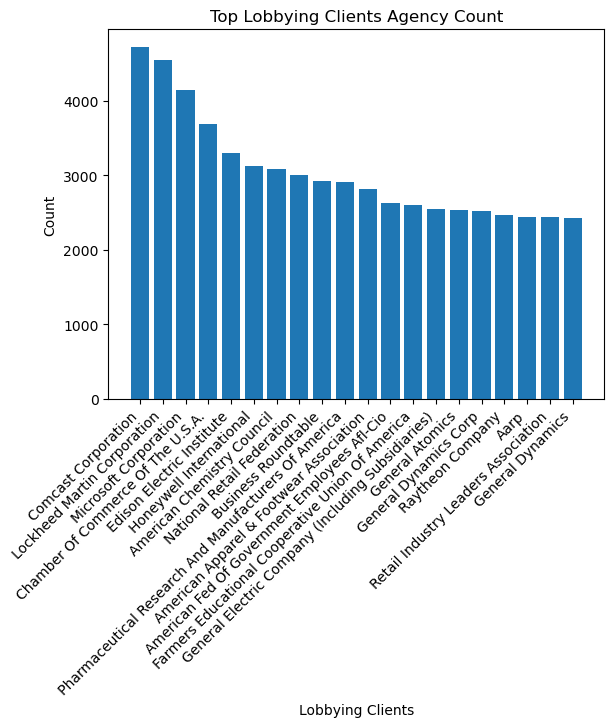

In [79]:
barplot = new_agencies_list[:20]
plt.bar(barplot.client_name, barplot.agency_count)
plt.xlabel('Lobbying Clients')
plt.ylabel('Count')
plt.title('Top Lobbying Clients Agency Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [17]:
## Clients with the most general issues
most_gen_issues = sql_select(engine, "SELECT client_name, general_issue_count FROM app_search_data WHERE general_issue_count IS NOT NULL")
cum_gen_issues = most_gen_issues.groupby('client_name')['general_issue_count'].sum().reset_index()
cum_gen_issues = cum_gen_issues.sort_values(['general_issue_count'], ascending = False).head(20)
cum_gen_issues

,client_name,general_issue_count
18387,Comcast Corporation,4819
44030,Microsoft Corporation,3807
14154,Chamber Of Commerce Of The U.S.A.,3525
23858,Edison Electric Institute,3247
40712,Lockheed Martin Corporation,3244
35351,Intel Corporation,2989
46314,National Association For The Advancement Of Co...,2982
10426,Boeing Company,2979
27775,Ford Motor Company,2711
3778,American Bankers Association,2687


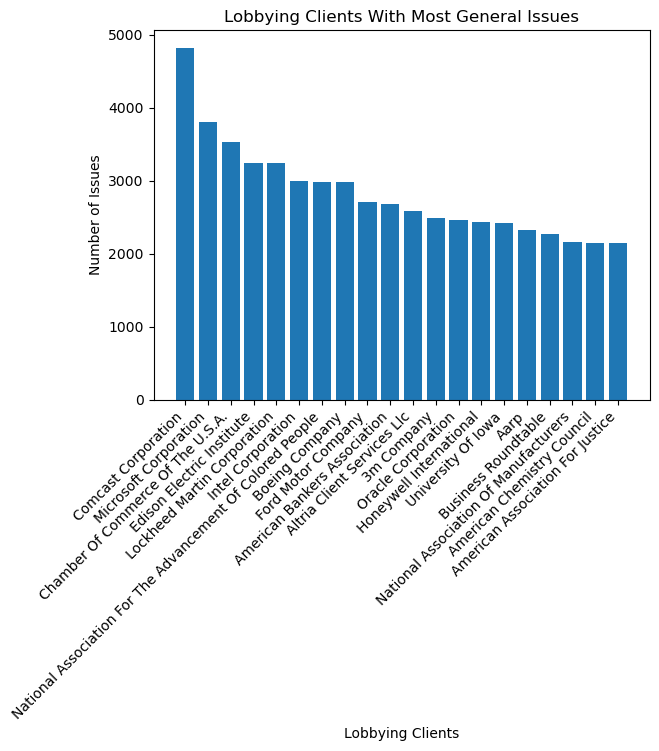

In [19]:
plt.bar(cum_gen_issues.client_name, cum_gen_issues.general_issue_count)
plt.xlabel('Lobbying Clients')
plt.ylabel('Number of Issues')
plt.title('Lobbying Clients With Most General Issues')
plt.xticks(rotation=45, ha='right')
plt.show()

In [174]:
## The client names that are repeated the most in the database
big_groups = sql_select(engine, "SELECT ticker_symbol FROM app_search_data WHERE NOT ticker_symbol = 'None'")
big_type = big_groups.ticker_symbol
counters = {}
for i in big_type:
    if i in counters:
        counters[i] += 1
    else:
        counters[i] = 1    
sorted_clients = dict(sorted(counters.items(), key=lambda x: x[1], reverse=True))
final_sorted_total = {key: sorted_clients[key] for key in list(sorted_clients.keys())}
final_sorted = {key: sorted_clients[key] for key in list(sorted_clients.keys())[0:10]}
print(final_sorted)

{'VZ': 3403, 'LMT': 2939, 'T': 2679, 'CMCSA': 2430, 'AMGN': 2242, 'GD': 1968, 'MSFT': 1965, 'BA': 1838, 'RTX': 1828, 'GE': 1757}


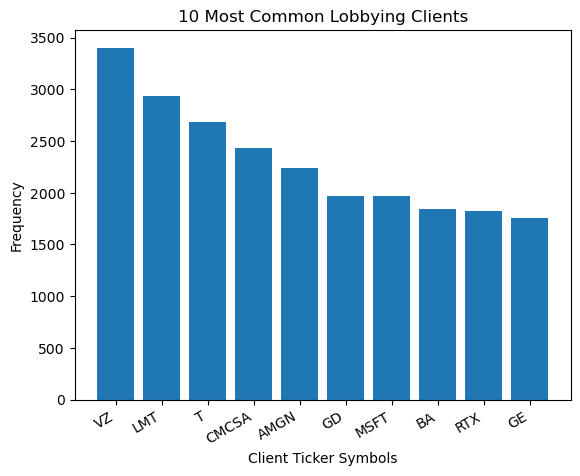

In [175]:
x_val = list(final_sorted.keys())
y_val = list(final_sorted.values())
plt.bar(x_val, y_val)
plt.xlabel('Client Ticker Symbols')
plt.ylabel('Frequency')
plt.title('10 Most Common Lobbying Clients')
plt.xticks(rotation= 30, ha='right')
plt.show()

In [22]:
# The types of lobbying

## What general issues showed up most frequently and the number of times they were repeated
types = sql_select(engine, "SELECT DISTINCT general_issues from app_search_data WHERE NOT general_issues = 'None'")
store_types = types.general_issues
lobbying_types = {}
for i in store_types:
    words = i.split(', ')
    for word in words:
        if word in lobbying_types:
            lobbying_types[word] += 1
        else:
            lobbying_types[word] = 1     
sorted_dict = dict(sorted(lobbying_types.items(), key=lambda x: x[1], reverse=True))
sorted_dict

{'Budget/Appropriations': 76680,
 'Taxation/Internal Revenue Code': 74510,
 'Health Issues': 46543,
 'Transportation': 45363,
 'Trade (domestic/foreign)': 41586,
 'Energy/Nuclear': 38944,
 'Environment/Superfund': 37414,
 'Labor Issues/Antitrust/Workplace': 32754,
 'Defense': 29872,
 'Education': 25915,
 'Homeland Security': 25887,
 'Agriculture': 24375,
 'Immigration': 22985,
 'Government Issues': 22152,
 'Copyright/Patent/Trademark': 19778,
 'Science/Technology': 19439,
 'Clean Air and Water (quality)': 19202,
 'Financial Institutions/Investments/Securities': 18770,
 'Medicare/Medicaid': 18387,
 'Law Enforcement/Crime/Criminal Justice': 17050,
 'Telecommunications': 17011,
 'Consumer Issues/Safety/Products': 16622,
 'Natural Resources': 16556,
 'Economics/Economic Development': 13349,
 'Housing': 13103,
 'Banking': 12954,
 'Aviation/Airlines/Airports': 11311,
 'Foreign Relations': 11308,
 'Food Industry (safety': 10881,
 'labeling': 10881,
 'etc.)': 10881,
 'Retirement': 10043,
 'Ins

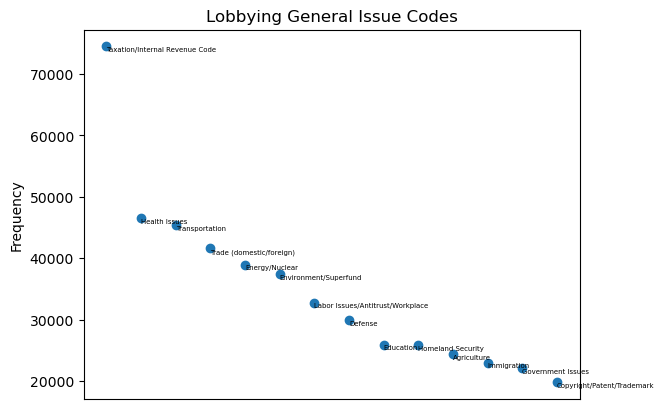

In [62]:
issue_labels = sql_select(engine, "SELECT DISTINCT general_issues from app_search_data WHERE NOT general_issues = 'None'")
gen_codes = issue_labels.general_issues
issue_label_dict = {}
for i in gen_codes:
    m = i.split(', ')
    for n in m:
        if n in issue_label_dict:
            issue_label_dict[n] += 1
        else:
            issue_label_dict[n] = 1
label_dict = dict(sorted(issue_label_dict.items(), key=lambda x: x[1], reverse=True))
subset = list(label_dict.items())[1:15]
subset_dict = dict(subset)
x_values = list(subset_dict.keys())
y_values = list(subset_dict.values())
keys = list(subset_dict.keys())
plt.scatter(x_values, y_values)
plt.ylabel('Frequency')
plt.xticks([])
plt.title('Top Lobbying General Issue Codes')

for i in range(len(keys)):
    plt.text(x_values[i], y_values[i], keys[i], fontsize = 5, va = 'top')
plt.show()


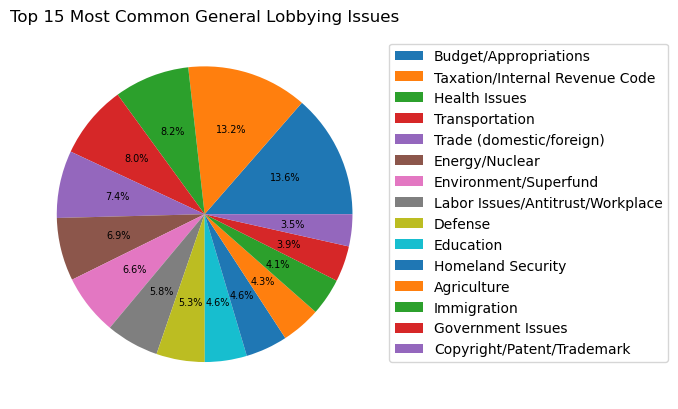

In [49]:
### Pie chart dictionary for only lobbying issues that appear over 5000 times

filtered_dict = {}
for key, value in sorted_dict.items():
    if value > 19500:
        filtered_dict[key] = value

plt.pie(filtered_dict.values(), labels = None, autopct='%1.1f%%', textprops={'fontsize': 7})
plt.legend(labels = filtered_dict.keys(), loc = (1,0.1))
plt.title('Top 15 Most Common General Lobbying Issues')
plt.show()

In [64]:
# Who spends the most on lobbying 
biggest_spender = sql_select(engine, "SELECT ticker_symbol, dollar_amount FROM app_search_data WHERE dollar_amount IS NOT NULL")
grouped_biggest_spender = biggest_spender.groupby('ticker_symbol')['dollar_amount'].sum().reset_index()
grouped_biggest_spender = grouped_biggest_spender.sort_values(['dollar_amount'], ascending = False).head(10)
grouped_biggest_spender

,ticker_symbol,dollar_amount
2111,WM,1.024028e+09
833,GE,6.227553e+08
1859,T,5.337788e+08
1171,LMT,5.228546e+08
2079,VZ,4.699029e+08
268,BA,4.653432e+08
1689,RTX,4.495795e+08
1520,PFE,4.302791e+08
473,CMCSA,3.809798e+08
1372,NOC,3.808239e+08


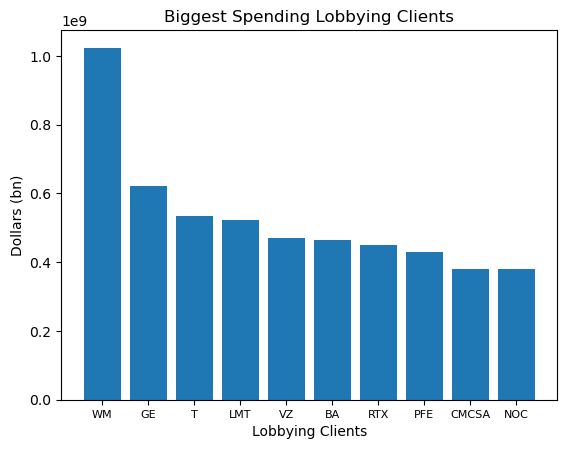

In [73]:
plt.bar(grouped_biggest_spender.ticker_symbol, grouped_biggest_spender.dollar_amount)
plt.xlabel('Lobbying Clients')
plt.ylabel('Dollars (bn)')
plt.title('Biggest Spending Lobbying Clients')
plt.xticks(fontsize = 8)
plt.show()

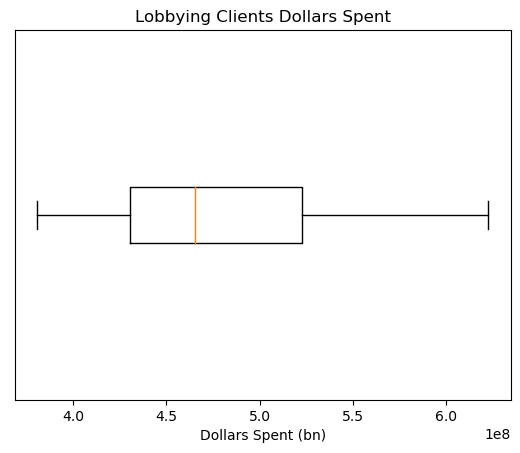

In [105]:
whole_grouped_biggest_spender = grouped_biggest_spender.sort_values(['dollar_amount'], ascending = False)[1:]
plt.boxplot(whole_grouped_biggest_spender.dollar_amount, vert = False)
plt.title('Lobbying Clients Dollars Spent')
plt.xlabel('Dollars Spent (bn)')
plt.yticks([])
plt.show()

In [5]:
# What are statistics of lobbying?

## proportion of clients with agencies

agency_prop = sql_select(engine, "SELECT client_name, agencies FROM app_search_data")
(agency_prop[agency_prop['agencies'] == 'None']).shape[0] / agency_prop.shape[0]

0.0003035483003458967

In [127]:
## proportion of clients with government entities

gov_ent_prop = sql_select(engine, "SELECT client_name, client_government_entity_bool FROM app_search_data")
(gov_ent_prop[gov_ent_prop['client_government_entity_bool'] == 1]).shape[0] / gov_ent_prop.shape[0]

0.06613903994608314

In [124]:
## proportion of clients with affiliated organizations

aff_orgs_prop = sql_select(engine, "SELECT client_name, aff_orgs_indicator_bool FROM app_search_data")
(aff_orgs_prop[aff_orgs_prop['aff_orgs_indicator_bool'] == 1]).shape[0] / aff_orgs_prop.shape[0]

0.006573899171770321

In [128]:
## proportion of clients with foreign entities

foreign_entities_prop = sql_select(engine, "SELECT client_name, foreign_entity_indicator_bool FROM app_search_data")
(foreign_entities_prop[foreign_entities_prop['foreign_entity_indicator_bool'] == 1]).shape[0] / foreign_entities_prop.shape[0]

0.005661269828511011

In [171]:
foreign_entities_prop1 = sql_select(engine, "SELECT client_name, foreign_entity_indicator, dollar_amount FROM app_search_data WHERE foreign_entity_indicator = 'Yes' and dollar_amount IS NOT NULL")
foreign_entities_prop2 = sql_select(engine, "SELECT client_name, foreign_entity_indicator, dollar_amount FROM app_search_data WHERE foreign_entity_indicator = 'No' and dollar_amount IS NOT NULL")

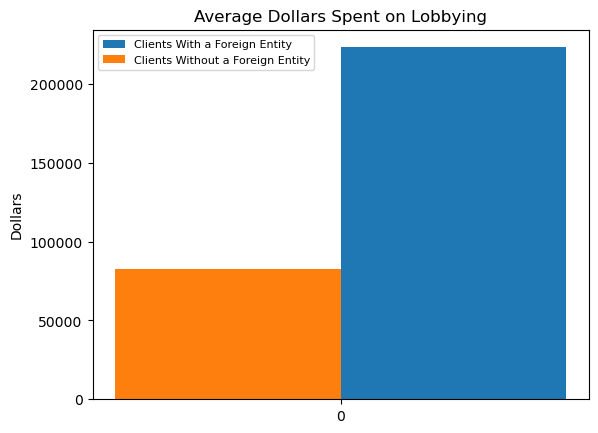

In [168]:
fep1 = [round(foreign_entities_prop1.dollar_amount.mean())]
fep2 = [round(foreign_entities_prop2.dollar_amount.mean())]
plt.bar(range(len(fep1)), fep1, width=0.4, align='edge')
plt.bar(range(len(fep2)), fep2, width=-0.4, align='edge')
plt.xticks(range(len(fep1)))
plt.ylabel('Dollars')
plt.title('Average Dollars Spent on Lobbying')

# Add a legend
plt.legend(['Clients With a Foreign Entity', 'Clients Without a Foreign Entity'], loc = "upper left", fontsize= 8)

# Show the chart
plt.show()

In [17]:
## total number of lobbying contracts

contracts = sql_select(engine, "SELECT COUNT(*) FROM app_search_data")
contracts

,count
0,1618019


# Get the client_uuid of Netflix first

In [1]:
# How much does Netflix spend on lobbying?

#First we need to get the client_uuid of netflix by searching for names similar to 'netflix'
netflix_client_uuid_query = """select client_uuid, client_id, name from ldb_client_mapping where lower(name) like '%%netflix%%'"""
netflix_client_uuid_search = sql_select(engine,netflix_client_uuid_query)
netflix_client_uuid_search


NameError: name 'sql_select' is not defined

In [16]:
# As you can see with the above, we have found a matching client_uuid, now let's grab the first one (or any of them, since they all correspond to one company)
netflix_client_uuid = netflix_client_uuid_search['client_uuid'].iloc[0]
print("The client UUID for netflix is:",netflix_client_uuid)


The client UUID for netflix is: e22a7397e92ca30d06edc53dc3cd1fdfae17e794bd0b89e43a


In [26]:
# Now, we use this client_uuid to search for netflix records
# To do this, we must use the client_uuid within the SQL query
# This is where the magic of Python and SQL comes in - you can dynamically insert data from python into sql queries using thi: {}, a 'string formatting' method

netflix_spending_query = """
select client_uuid,
       client_name,
       dollar_amount
from app_search_data
where client_uuid = '{netflix_client_uuid}'
"""


print("String formatting in action:",netflix_spending_query.format(netflix_client_uuid=netflix_client_uuid))

String formatting in action: 
select client_uuid,
       client_name,
       dollar_amount
from app_search_data
where client_uuid = 'e22a7397e92ca30d06edc53dc3cd1fdfae17e794bd0b89e43a'



In [28]:
Netflix = sql_select(engine, netflix_spending_query.format(netflix_client_uuid=netflix_client_uuid))

print("The correct dollar amount spent on lobbying by Netflix is:",Netflix.dollar_amount.sum())

The correct dollar amount spent on lobbying by Netflix is: 14415000.0


# Now let's try the same thing for Amazon

In [29]:
# How much does Amazon spend on lobbying?

Amazon = sql_select(engine, "SELECT client_uuid, client_name, dollar_amount FROM app_search_data WHERE lower(client_name) LIKE '%%amazon%%' AND dollar_amount IS NOT NULL")
Amazon.dollar_amount.sum()

198533914.0